In [18]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [5]:
wine = load_wine()
print(f"所有特征：{wine.feature_names}")
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

所有特征：['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [9]:

base_model = DecisionTreeClassifier(max_depth=1, criterion='gini',random_state=1).fit(X_train, y_train)
y_pred = base_model.predict(X_test)
print(f"决策树的准确率：{accuracy_score(y_test,y_pred):.3f}")


决策树的准确率：0.694


In [12]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator=base_model,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"AdaBoost的准确率：{accuracy_score(y_test,y_pred):.3f}")

AdaBoost的准确率：0.972


## 测试估计器个数的影响

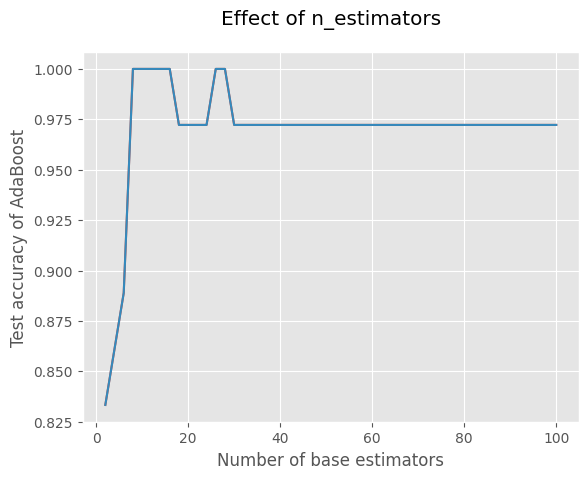

In [15]:
x = list(range(2, 102, 2))
y = []

for i in x:
  model = AdaBoostClassifier(base_estimator=base_model,
                              n_estimators=i,
                              learning_rate=0.5,
                              algorithm='SAMME.R',
                              random_state=1)
  
  model.fit(X_train, y_train)
  model_test_sc = accuracy_score(y_test, model.predict(X_test))
  y.append(model_test_sc)

plt.style.use('ggplot')
plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)
plt.show()

## 测试学习率的影响

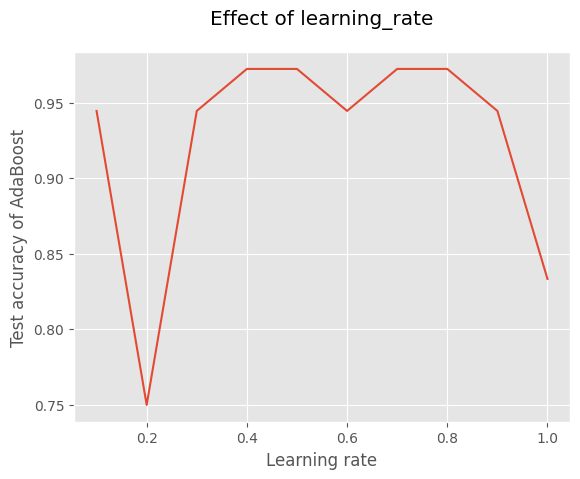

In [16]:

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y = []

for i in x:
  model = AdaBoostClassifier(base_estimator=base_model,
                              n_estimators=50,
                              learning_rate=i,
                              algorithm='SAMME.R',
                              random_state=1)
  
  model.fit(X_train, y_train)
  model_test_sc = accuracy_score(y_test, model.predict(X_test))
  y.append(model_test_sc)

plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)
plt.show()


## 使用GridSearchCV自动调参

In [19]:
hyperparameter_space = {'n_estimators':list(range(2, 102, 2)), 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}



gs = GridSearchCV(AdaBoostClassifier(base_estimator=base_model,
                                     algorithm='SAMME.R',
                                     random_state=1),
                  param_grid=hyperparameter_space, 
                  scoring="accuracy", n_jobs=-1, cv=5)

gs.fit(X_train, y_train)
print("最优超参数:", gs.best_params_)

最优超参数: {'learning_rate': 0.8, 'n_estimators': 42}
